<a href="https://colab.research.google.com/github/heptaclone/datasharing/blob/master/Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('primary-tumor.data')
df.head()

Saving primary-tumor.data to primary-tumor.data


,1,1.1,1.2,?,3,2,2.1,1.3,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,2.10,2.11
0,1,1,1,?,3,2,2,2,2,2,1,2,2,2,1,2,1,2
1,1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
2,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
3,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,?,3,1,2,2,2,2,2,1,2,2,1,1,1,2


In [ ]:
#Count the number of rows and columns in dataset
df.shape

(338, 18)

In [ ]:
#Count the number of empty values in each column
df.isna().sum()

1       0
1.1     0
1.2     0
?       0
3       0
2       0
2.1     0
1.3     0
2.2     0
2.3     0
2.4     0
2.5     0
2.6     0
2.7     0
2.8     0
2.9     0
2.10    0
2.11    0
dtype: int64

In [ ]:
#Look at the data types to see which columns need to be encoded
df.dtypes

1        int64
1.1      int64
1.2     object
?       object
3       object
2        int64
2.1      int64
1.3      int64
2.2      int64
2.3      int64
2.4      int64
2.5      int64
2.6     object
2.7      int64
2.8      int64
2.9     object
2.10     int64
2.11     int64
dtype: object

In [ ]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc [:, 1] = labelencoder_Y.fit_transform(df.iloc[:, 1].values)
df.iloc [:, 1]

0      0
1      0
2      0
3      0
4      0
      ..
333    1
334    1
335    1
336    2
337    2
Name: 1.1, Length: 338, dtype: int64

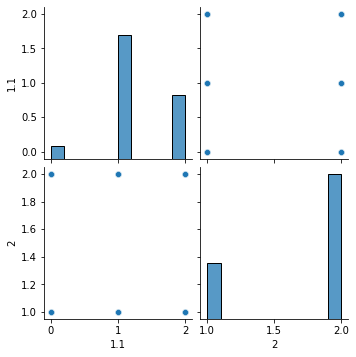

In [ ]:
#Create a pairplot
sns.pairplot (df.iloc [:, 1:6])

In [ ]:
#Print the first 6 rows of new data
df.head(6)

,1,1.1,1.2,?,3,2,2.1,1.3,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,2.10,2.11
0,1,0,1,?,3,2,2,2,2,2,1,2,2,2,1,2,1,2
1,1,0,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
2,1,0,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
3,1,0,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,0,2,?,3,1,2,2,2,2,2,1,2,2,1,1,1,2
5,1,1,1,1,1,1,2,2,2,2,2,2,1,1,1,2,2,2


In [ ]:
#Get the correlation
df.iloc[:, 1:12].corr()

,1.1,2,2.1,1.3,2.2,2.3,2.4,2.5
1.1,1.000000,0.229808,0.101626,-0.042989,0.048718,0.045378,-0.219725,0.071265
2,0.229808,1.000000,0.187931,0.070579,-0.013634,-0.211817,-0.188071,0.059078
2.1,0.101626,0.187931,1.000000,0.023484,-0.027661,0.093935,0.033005,0.134696
1.3,-0.042989,0.070579,0.023484,1.000000,0.078858,-0.060462,0.093920,0.011926
2.2,0.048718,-0.013634,-0.027661,0.078858,1.000000,0.236328,-0.018072,-0.019461
2.3,0.045378,-0.211817,0.093935,-0.060462,0.236328,1.000000,0.117769,-0.051869
2.4,-0.219725,-0.188071,0.033005,0.093920,-0.018072,0.117769,1.000000,-0.046468
2.5,0.071265,0.059078,0.134696,0.011926,-0.019461,-0.051869,-0.046468,1.000000


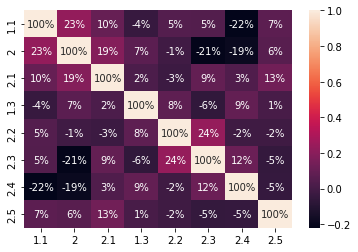

In [ ]:
#Visualize the correlation
sns.heatmap(df.iloc[:, 1:12].corr(), annot = True, fmt = '.0%')

In [ ]:
#Split the data into two new independent (x) and dependent (Y) data sets
 = df.iloc [:, 2:25].values
Y = df.iloc [:, 1].values

In [ ]:
#Split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25, random_state = 0)

In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
